In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [4]:
# reading data , Bengaluru House Dataset used

df=pd.read_csv(r"H:\M.tech Data science PDPU\PRML LAB\CSV\bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Exercise 2

Perform data pre-processing

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
x = df[['size','total_sqft','bath','balcony']]
y = df['price']

In [7]:
pd.options.mode.chained_assignment = None

for col in x:
    if col == 'size':
        x['size'] = x['size'].str.extract('(\d+)').astype(float)
        x['size'].fillna(x['size'].mean(), inplace=True)
    elif col == 'bath':
        x['bath'].fillna(x['bath'].mean(), inplace=True)
    elif col == 'balcony':
        x['balcony'].fillna(x['balcony'].mean(), inplace=True)

In [8]:
# Function to clean and convert 'total_sqft' values
def clean_and_convert_total_sqft(sqft_str):
    # Remove non-numeric characters and whitespace
    sqft_str = ''.join(filter(str.isdigit, sqft_str))
    if '-' in sqft_str:
        # If the value is in a range format, calculate the average
        sqft_parts = sqft_str.split('-')
        lower_sqft = float(sqft_parts[0].strip())
        upper_sqft = float(sqft_parts[1].strip())
        return (lower_sqft + upper_sqft) / 2
    else:
        return float(sqft_str)

# Apply the function to the 'total_sqft' column
x['total_sqft'] = x['total_sqft'].apply(clean_and_convert_total_sqft)

In [9]:
normalized_df = (x - x.mean()) / x.std()
normalized_df

,size,total_sqft,bath,balcony
0,-0.621037,-0.016879,-0.517732,-7.319698e-01
1,0.924324,-0.016879,1.724795,1.773164e+00
2,0.151644,-0.016879,-0.517732,1.773164e+00
3,0.151644,-0.016879,0.229777,-7.319698e-01
4,-0.621037,-0.016879,-0.517732,-7.319698e-01
...,...,...,...,...
13315,1.697005,-0.016878,0.977286,-1.984537e+00
13316,0.924324,-0.016878,1.724795,-2.781257e-16
13317,-0.621037,-0.016879,-0.517732,-7.319698e-01
13318,0.924324,-0.016878,0.977286,-7.319698e-01


In [10]:
x = normalized_df

In [11]:
x.isnull().sum()

size          0
total_sqft    0
bath          0
balcony       0
dtype: int64

In [12]:
x

,size,total_sqft,bath,balcony
0,-0.621037,-0.016879,-0.517732,-7.319698e-01
1,0.924324,-0.016879,1.724795,1.773164e+00
2,0.151644,-0.016879,-0.517732,1.773164e+00
3,0.151644,-0.016879,0.229777,-7.319698e-01
4,-0.621037,-0.016879,-0.517732,-7.319698e-01
...,...,...,...,...
13315,1.697005,-0.016878,0.977286,-1.984537e+00
13316,0.924324,-0.016878,1.724795,-2.781257e-16
13317,-0.621037,-0.016879,-0.517732,-7.319698e-01
13318,0.924324,-0.016878,0.977286,-7.319698e-01


Draw a scatter plot for the data mentioned for given attributes.

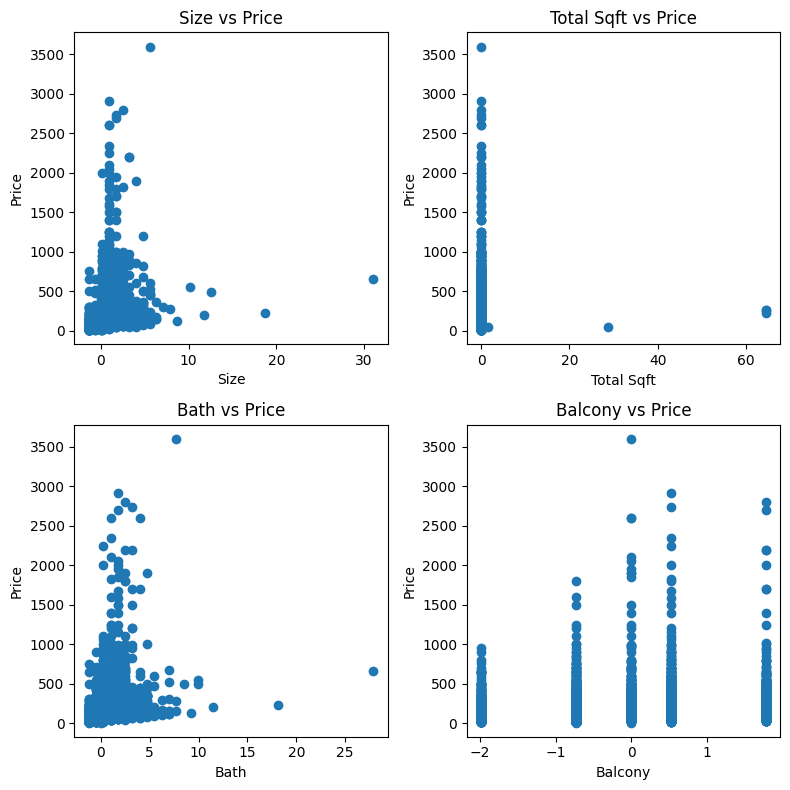

In [13]:
plt.figure(figsize=(8, 8))

# Scatter plot for 'size' vs 'price'
plt.subplot(2, 2, 1)
plt.scatter(x['size'], y)
plt.title('Size vs Price')
plt.xlabel('Size')
plt.ylabel('Price')

# Scatter plot for 'total_sqft' vs 'price'
plt.subplot(2, 2, 2)
plt.scatter(x['total_sqft'], y)
plt.title('Total Sqft vs Price')
plt.xlabel('Total Sqft')
plt.ylabel('Price')

# Scatter plot for 'bath' vs 'price'
plt.subplot(2, 2, 3)
plt.scatter(x['bath'], y)
plt.title('Bath vs Price')
plt.xlabel('Bath')
plt.ylabel('Price')

# Scatter plot for 'balcony' vs 'price'
plt.subplot(2, 2, 4)
plt.scatter(x['balcony'], y)
plt.title('Balcony vs Price')
plt.xlabel('Balcony')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Exercise 3

Performs gradient descent to learn theta. (using the library and without using the library). Compare the values of theta in both cases.

finding theta using gradiant descent

In [14]:
x1, x2, x3, x4 = x['size'], x['total_sqft'], x['bath'], x['balcony']

# Initialize Theta parameters with small random values
np.random.seed(0)
Theta_0, Theta_1, Theta_2, Theta_3, Theta_4 = np.random.rand(5)

learning_rate = 0.00000000000000001
epochs = 100

n = float(len(x))

for i in range(epochs):
    y_pred = Theta_0 + Theta_1 * x1 + Theta_2 * x2 + Theta_3 * x3 + Theta_4 * x4
    d_theta_0 = (-2 / n) * np.sum(y - y_pred)
    d_theta_1 = (-2 / n) * np.sum(x1 * (y - y_pred))
    d_theta_2 = (-2 / n) * np.sum(x2 * (y - y_pred))
    d_theta_3 = (-2 / n) * np.sum(x3 * (y - y_pred))
    d_theta_4 = (-2 / n) * np.sum(x4 * (y - y_pred))
    
    Theta_0 -= learning_rate * d_theta_0
    Theta_1 -= learning_rate * d_theta_1
    Theta_2 -= learning_rate * d_theta_2
    Theta_3 -= learning_rate * d_theta_3
    Theta_4 -= learning_rate * d_theta_4

print("Theta without using library:", Theta_0, Theta_1, Theta_2, Theta_3, Theta_4)

Theta without using library: 0.5488135039275468 0.7151893663725305 0.6027633760716439 0.5448831829970301 0.42365479933893246


> finding theta using library

In [15]:
# Performs gradient descent to learn theta, using the library

from sklearn.linear_model import LinearRegression
model = LinearRegression()
# x = x.reshape(-1, 1)
model.fit(x, y)

# Get the learned coefficients (theta)
theta_1_library = model.coef_
theta_0_library = model.intercept_

print("Theta using library:", theta_0_library, theta_1_library)

Theta using library: 112.56562650150148 [-8.10225626  1.62192542 74.50162619  3.27547569]


# Exercise 4

Splitting data into the training and testing, 60:40, 70:30, and 80:20.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn import linear_model

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for training and testing, 60:40

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40 , random_state=42)

In [20]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
mse=cross_val_score(reg,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("mean for the 60:40 :", np.mean(mse))

mean for the 60:40 : -17919.41592934295


In [23]:
reg.score(x_train,y_train)

0.2072367293677494

> for training and testing, 70:30

In [24]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.30 , random_state=42)
x_train=scaler.fit_transform(x_train1)
x_test=scaler.transform(x_test1)

In [25]:
reg = linear_model.LinearRegression()
reg.fit(x_train1, y_train1)

LinearRegression()

In [26]:
mse1 = cross_val_score(reg, x_train1, y_train1, scoring='neg_mean_squared_error',cv=5)
print("mean for the 70:30 :", np.mean(mse1))

mean for the 70:30 : -17355.21727850583


In [27]:
reg.score(x_train1, y_train1)

0.2110516015496149

> for training and testing, 80:20

In [28]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.20 , random_state=42)
x_train=scaler.fit_transform(x_train2)
x_test=scaler.transform(x_test2)

In [29]:
reg = linear_model.LinearRegression()
reg.fit(x_train2, y_train2)


LinearRegression()

In [30]:
mse2 = cross_val_score(reg, x_train2, y_train2, scoring='neg_mean_squared_error',cv=5)
print("mean for the 80:20 :", np.mean(mse2))

mean for the 80:20 : -17734.136902709004


In [31]:
reg.score(x_train2, y_train2)

0.21168342560152198

for train test 60:40

mse : -17919.415929342947
model score : 0.2072367293677494
for train test 70:30

mse : -17355.217278505832
model score : 0.21105160154961466
for train test 80:20

mse : -17734.136902709004
model score : 0.21168342560152198

# Exercise 5

> Train multilinear regression model and test USING Gradient Descent and using the library. Compare your results with Simple Linear Regression.

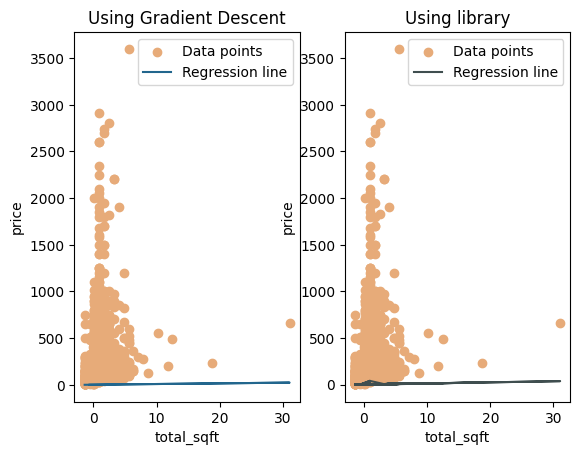

In [33]:
regression_line = Theta_1 * x['size'] + Theta_0
regression_line_2 = Theta_0 + Theta_1 * x1 + Theta_2 * x2 + Theta_3 * x3 + Theta_4 * x4

plt.subplot(1,2,1)
plt.scatter(x['size'], y, label='Data points', c='#E7AB79')
plt.plot(x['size'], regression_line, color='#22668D', label='Regression line')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Using Gradient Descent')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x['size'], y, label='Data points', c='#E7AB79')
plt.plot(x['size'], regression_line_2, color='#3F4E4F', label='Regression line')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Using library')
plt.legend()

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


# Exercise 6

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_model = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5)
ridge_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]})

In [37]:
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}
lasso_model = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5)
lasso_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]})

> Evaluate Ridge Regression

In [38]:
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

In [39]:
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R-squared:", lasso_r2)

Lasso Regression MSE: 17148.926200076447
Lasso Regression R-squared: 0.1945282870586067


> finding best feature from Lasso

In [40]:
lasso_coefficients = lasso_model.best_estimator_.coef_
selected_features = x.columns[lasso_coefficients != 0]
print("Selected features in Lasso:", selected_features)

Selected features in Lasso: Index(['total_sqft', 'bath', 'balcony'], dtype='object')
